# ニューラルネットワーク
パーセプトロンでは複雑な関数においても表現できることが分かった。しかし，層がふえるにつれ各ノードの重みは増えていくため，重みを入力する作業は人力であることは良いことではない。この章では適切な重みをデータから自動で学習できるニューラルネットワークについて学習する。
- 活性化関数
    - シグモイド関数
    - ステップ関数
    - ReLU関数
    
## 活性化関数
入力信号を出力信号に変換する関数を活性化関数(activation function)と呼ぶ。活性化関数は入力信号の総和がどのように活性化するか(どのように発火するか)ということを決定する役割がある。
$$
a = b + \omega_1x_1 + \omega_2x_2
\\
y = h(a)
$$
上記式ではまず，重み付き信号入力とバイアスの総和を計算する($a$とする)。そして$a$が$h()$で変換され$y$が出力される。という流れになる。
### シグモイド関数
ニューラルネットワークにおいてよく用いられる活性化関数の一つにシグモイド関数がある。
$$
h(x) = \frac{1}{ a + exp(-x)}
$$
Pythonによる実装を行い，特徴を見ていこう。

In [28]:
import numpy as np
import matplotlib.pyplot as plt

LC='olive'
MKR = '+'

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
x = np.array([-1.0, 1.0, 2.0])
#なぜリストを引数にできるの...? -> "Python ブロードキャスト"を参照
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

値は出力されたが，飛び飛びの値なのでシグモイド関数の全容を把握しにくい。   
そこでシグモイド関数をグラフにプロットしてみよう。

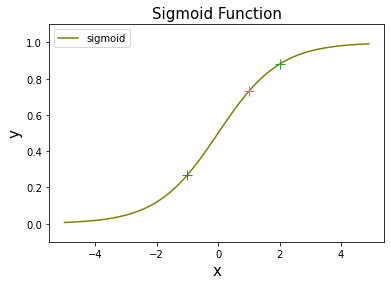

In [40]:
x = np.arange(-5., 5., 0.1)
y = sigmoid(x)
plt.plot(x, y, color=LC, label="sigmoid")
plt.plot(-1.0, sigmoid(-1.0), marker=MKR, markersize=10)
plt.plot(1.0, sigmoid(1.0), marker=MKR, markersize=10)
plt.plot(2.0, sigmoid(2.0), marker=MKR, markersize=10)
plt.ylim(-0.1, 1.1)
plt.title('Sigmoid Function',fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15)
plt.legend()
plt.show()

グラフをよく見てみると，$(0, 0.5)$を基点とした点対称になっている。

### ステップ関数
ステップ関数は入力が0を超えたら1を出力し，それ以外は0を出力する関数。
$$
h(x) = 
    \begin{cases}
        1 \quad (x > 0) \\
        0 \quad (otherwise) \\
    \end{cases}
$$
とても単純な形をしている。さっそく実装してみよう。


In [30]:
def step(x):
    y = x > 0
    #Boolean To Integer
    return y.astype(np.int)

In [31]:
x = np.array([-1., 1., 2.])
step(x)

array([0, 1, 1])

シグモイド関数に倣いプロットしてみよう。

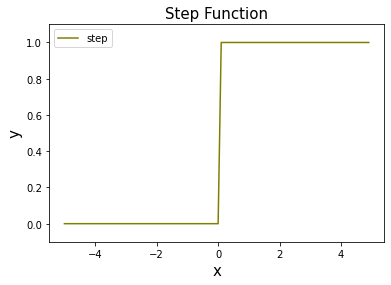

In [42]:
x = np.arange(-5., 5., 0.1)
y = step(x)
plt.plot(x, y, color=LC, label="step")
plt.ylim(-0.1, 1.1)
plt.title('Step Function',fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15)
plt.legend()
plt.show()

### ステップ関数とシグモイド関数の比較
ステップ関数とシグモイド関数の違いは角ばった形をしているか曲線になっているかということである。一言でいうならば関数の「滑らかさ」の違いである。シグモイド関数は滑らかな曲線であり，入力に対して連続的に出力が変化している。一方，ステップ関数は0を境に急に出力を変えている。出力値についてもシグモイド関数は実数値を返すのに対して，ステップ関数は0か1の値しか返さない。

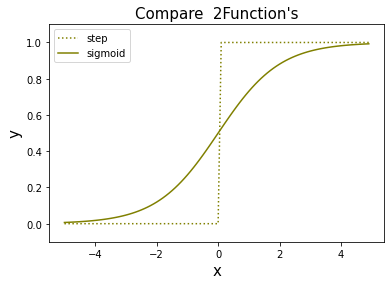

In [45]:
x = np.arange(-5., 5., 0.1)
y1 = step(x)
y2 = sigmoid(x)
plt.plot(x, y1, color=LC, linestyle=':', label="step")
plt.plot(x, y2, color=LC, label="sigmoid")
plt.ylim(-0.1, 1.1)
plt.title('Compare  2Function\'s',fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15)
plt.legend()
plt.show()

### $ReLU$関数
最近のニューラルネットワークの活性化関数では$ReLU$関数(Rectified Linear Unit)が用いられることが多い。入力が0を超えていればそのまま出力し，0を超えていなければ0を出力する関数である。
$$
h(x) = 
    \begin{cases}
        x \quad (x > 0) \\
        0 \quad (x \leqq 0) \\
    \end{cases}
$$
ステップ関数同様，単純な関数である。では，Pythonによる実装をしてみよう。

In [46]:
def relu(x):
    return np.maximum(0, x)

In [47]:
x = np.array([-1., 1., 2.])
relu(x)

array([0., 1., 2.])

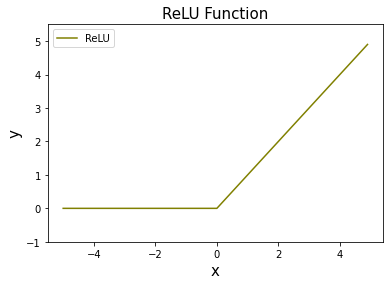

In [55]:
x = np.arange(-5., 5., 0.1)
y = relu(x)
plt.plot(x, y, color=LC, label="ReLU")
plt.ylim(-1., 5.5)
plt.title('ReLU Function',fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15)
plt.legend()
plt.show()